<a href="https://colab.research.google.com/github/nirmalraajumb/CODING-AND-PROJECTS/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Then calculate the correlation matrix excluding the 'Date' column
correlation = gold_data.drop(columns=['Date']).corr()

<Axes: >

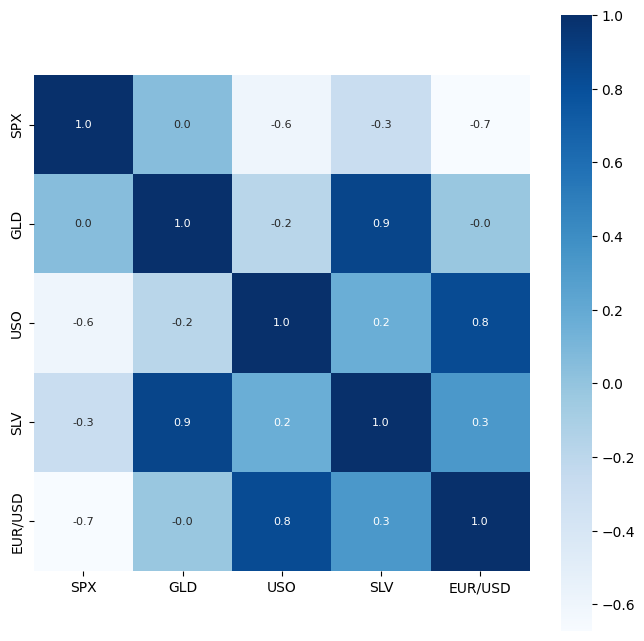

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


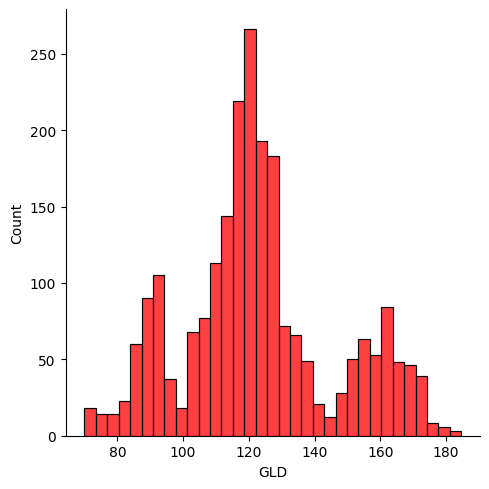

In [15]:
sns.displot(gold_data['GLD'], color='red')

Splitting feature and target


In [16]:
X=gold_data.drop(['GLD','Date'],axis=1)
Y=gold_data['GLD']

In [17]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Train and Test Data


In [19]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

Model Training
Random Forrest

In [20]:
regressor=RandomForestRegressor(n_estimators=100)

In [21]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation


In [22]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[164.19039989 127.56399893 124.18440002 119.61709884 126.12029886
  86.52159805 171.68200219 137.03280049 106.84070034 133.20100194
 120.66829925 124.89200046 143.62439851 104.59820002  81.08079876
 119.1962002  140.21809911  90.33230087  91.48979956 128.37970238
 125.86619941 147.70570003 116.70010157 153.23349829 129.62699838
 129.34930106 118.15040114 111.37460036 169.35650178 157.87639828
 126.08490175 153.74910159 127.00819938 122.92399793 116.33660139
 154.70709994 115.1030998  120.52150154 103.89710204 105.44040052
 135.46399921  85.89989961 155.65400029 121.11109977 122.36070095
 155.41300117 120.44060001 116.60789964 169.12380315 116.4124008
 138.31270134 161.68809886 158.36009992 152.93450129 124.08970044
 117.04890008 167.38189976 117.2151994  165.88069986  84.14999988
 121.33079944 122.26290008 120.17570007 171.98139893 119.03879943
 180.72779609 161.11280277 139.61430254 115.6738999   92.48130063
 171.85300007 117.63149983 117.66239846 125.63480005 147.48049959
  91.293100

In [24]:
from logging import error
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)


R squared error :  0.9850886671302285


Compare the actual and predicted value in a plot

In [25]:
Y_test=list(Y_test)

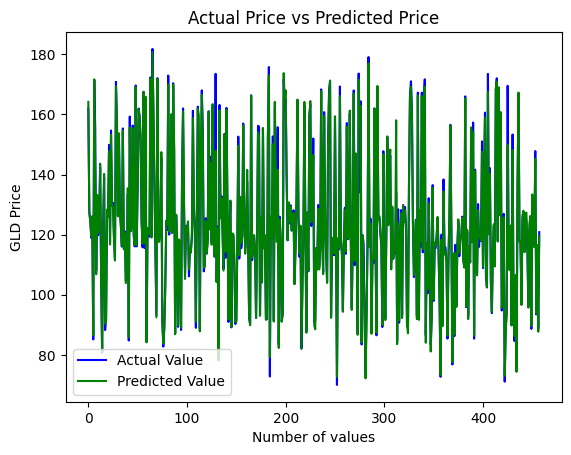

In [27]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()